In [53]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

In [50]:
#dane
data = fetch_openml(data_id=31)

# Utwórz DataFrame z danych i etykiet
df = pd.DataFrame(data.data, columns=data.feature_names)

# Dodaj kolumnę z etykietami
df['target'] = pd.Series(data.target, name='target')

df = pd.get_dummies(df)
df.replace({True: 1, False: 0}, inplace=True)
y = df['target_good'] 
X = df.drop(['target_good', 'target_bad'], axis=1)
# zbiór testowy i treningowy 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=335723)
X_train

c:\Users\Kajetan\Desktop\pw\venv\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,...,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes
15,24.0,1282.0,4.0,2.0,32.0,1.0,1.0,0,1,0,...,1,0,0,0,0,1,1,0,0,1
559,18.0,1928.0,2.0,2.0,31.0,2.0,1.0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
542,30.0,6350.0,4.0,4.0,31.0,1.0,1.0,0,1,0,...,1,0,0,1,0,0,1,0,0,1
974,30.0,2831.0,4.0,2.0,33.0,1.0,1.0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
952,24.0,4113.0,3.0,4.0,28.0,1.0,1.0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,27.0,2520.0,4.0,2.0,23.0,2.0,1.0,1,0,0,...,1,0,0,0,0,1,1,0,0,1
404,18.0,2899.0,4.0,4.0,43.0,1.0,2.0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
863,27.0,4526.0,4.0,2.0,32.0,2.0,2.0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
330,24.0,6615.0,2.0,4.0,75.0,2.0,1.0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


Dokładność: 0.7267
Precyzja: 0.7565
Czułość: 0.8700
Wartość AUC: 0.7625


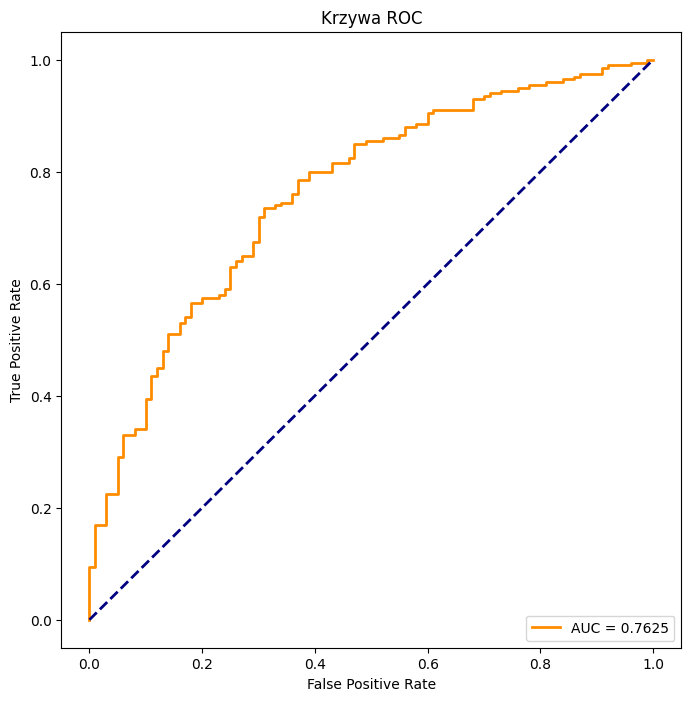

In [57]:

#model regresji logistycznej
model_lr = LogisticRegression(penalty = None , max_iter = 300).fit(X_train,y_train) 

y_pred = model_lr.predict(X_test)
y_proba = model_lr.predict_proba(X_test)[:, 1] 

#miary 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_proba)

print(f'Dokładność: {accuracy:.4f}')
print(f'Precyzja: {precision:.4f}')
print(f'Czułość: {recall:.4f}')
print(f'Wartość AUC: {auc_value:.4f}')

#krzywa

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.show()

Najlepsze parametry: {'C': 0.5}
Dokładność: 0.7333
Precyzja: 0.7586
Czułość: 0.8800
Wartość AUC: 0.7674


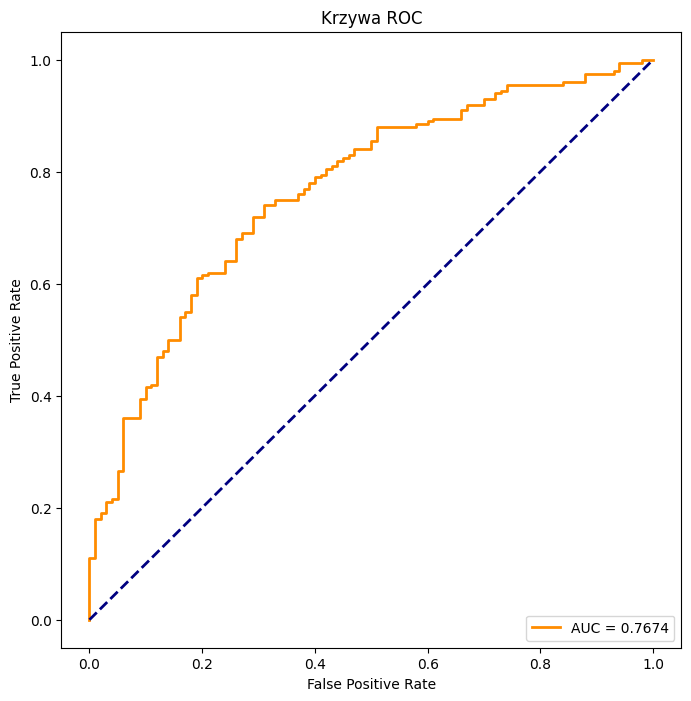

Współczynniki:
   Variable  Coefficient
0     Var_1    -0.015948
1     Var_2    -0.000126
2     Var_3    -0.491714
3     Var_4     0.000000
4     Var_5     0.023401
..      ...          ...
56   Var_57     0.004676
57   Var_58     0.000000
58   Var_59     0.157972
59   Var_60     0.704934
60   Var_61     0.000000

[61 rows x 2 columns]

Zmienne istotne:
0      Var_1
2      Var_3
4      Var_5
5      Var_6
8      Var_9
9     Var_10
10    Var_11
12    Var_13
22    Var_23
25    Var_26
30    Var_31
32    Var_33
36    Var_37
39    Var_40
41    Var_42
46    Var_47
48    Var_49
58    Var_59
59    Var_60
Name: Variable, dtype: object


In [68]:
#model regresji logistycznej z regularyzacją L1
model_l1 = LogisticRegression(penalty='l1', solver = 'liblinear') 
param_grid = {
    'C': [10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005]
}


# Utwórz obiekt GridSearchCV
grid_search = GridSearchCV(model_l1, param_grid, cv=5, scoring='accuracy')

# Dopasuj model do danych treningowych
grid_search.fit(X_train, y_train)

# Wydrukuj najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1] 
#miary 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_proba)

print(f'Dokładność: {accuracy:.4f}')
print(f'Precyzja: {precision:.4f}')
print(f'Czułość: {recall:.4f}')
print(f'Wartość AUC: {auc_value:.4f}')

#krzywa

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.show()


c:\Users\Kajetan\Desktop\pw\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kajetan\Desktop\pw\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Najlepsze parametry: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Dokładność: 0.7267
Precyzja: 0.7521
Czułość: 0.8800
Wartość AUC: 0.7769


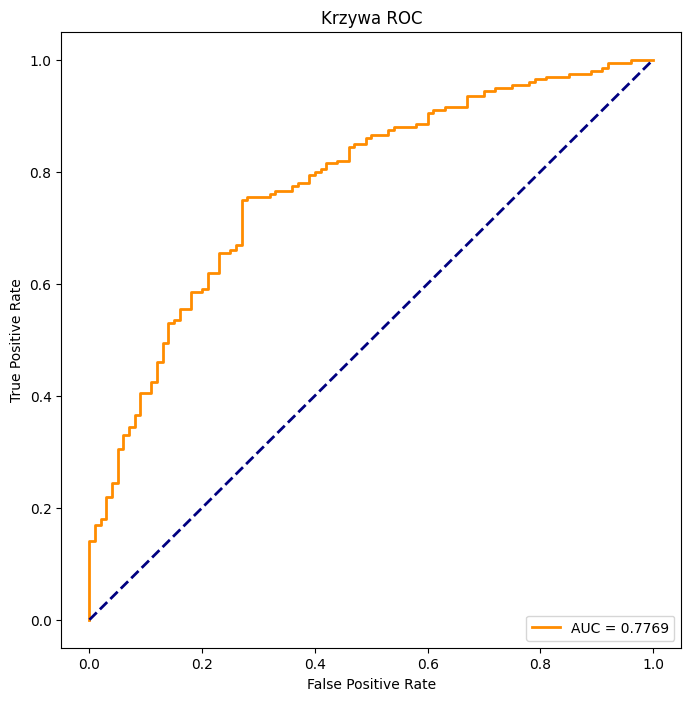

In [64]:

#model regresji logistycznej z regularyzacją L2
model_l1 = LogisticRegression(penalty='l2') 
param_grid = {
    'C': [10, 5, 2, 1, 0.5, 0.1, 0.01, 0.005],
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky',
                'sag', 'saga'],
    'max_iter' : [100,300]
}


# Utwórz obiekt GridSearchCV
grid_search = GridSearchCV(model_l1, param_grid, cv=5, scoring='accuracy')

# Dopasuj model do danych treningowych
grid_search.fit(X_train, y_train)

# Wydrukuj najlepsze parametry
print("Najlepsze parametry:", grid_search.best_params_)


y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1] 
#miary 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc_value = roc_auc_score(y_test, y_proba)

print(f'Dokładność: {accuracy:.4f}')
print(f'Precyzja: {precision:.4f}')
print(f'Czułość: {recall:.4f}')
print(f'Wartość AUC: {auc_value:.4f}')

#krzywa

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc='lower right')
plt.show()